<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis**


Estimated time needed: **30** minutes

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

In this notebook, we will learn some interesting and useful data exploration techniques that can be applied to explore any geographical data.


## Objectives


*After completing this lab you will be able to:*

*   Do Data Wrangling
*   Do Data Filtering 
*   Plot with <code>plotly.express</code>
*   Produce choropleth map


***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/) for managing the data.
 - [`plotly.express`](https://plotly.com/python/plotly-express/) for visualizing the data.
 - [`json`](https://docs.python.org/3/library/json.html/) for reading json file formats.
 


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
import pandas as pd
import plotly.express as px
import datetime 
import requests
import json

## **Reading and understanding our data**


The dataset in this lab is <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000101">Monthly average retail prices for gasoline and fuel oil, by geography</a>  . It is available through Statistics Canada and includes monthly average gasoline price (Cents per Litre), of major Canadian Cities, starting from 1979 until recent. 


Another dataset, <a href="https://thomson.carto.com/tables/canada_provinces/public/map">canada_provinces.geojson</a>, contains the mapping information of all Canadian Provinces. It will be used in our analysis to produce a choropleth map. 


Let's read the data into *pandas* dataframe and look at the first 5 rows using the `head()` method. 


In [2]:
gasoline = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/18100001.csv")
gasoline.head()

,REF_DATE,GEO,DGUID,Type of fuel,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,Jan-79,"St. John's, Newfoundland and Labrador",2011S0503001,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735046,2.1,26.0,NaN,NaN,t,1
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",NaN,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735056,3.1,24.6,NaN,NaN,t,1
2,Jan-79,"Halifax, Nova Scotia",2011S0503205,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735057,4.1,23.4,NaN,NaN,t,1
3,Jan-79,"Saint John, New Brunswick",2011S0503310,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735058,5.1,23.2,NaN,NaN,t,1
4,Jan-79,"Québec, Quebec",2011S0503421,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735059,6.1,22.6,NaN,NaN,t,1


Let's find out how many entries there are in our dataset, using `shape` function.


In [3]:
gasoline.shape

(41942, 15)

Using `info` function, we will take a look at our types of data.


In [4]:
gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41942 entries, 0 to 41941
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       41942 non-null  object 
 1   GEO            41942 non-null  object 
 2   DGUID          39451 non-null  object 
 3   Type of fuel   41942 non-null  object 
 4   UOM            41942 non-null  object 
 5   UOM_ID         41942 non-null  int64  
 6   SCALAR_FACTOR  41942 non-null  object 
 7   SCALAR_ID      41942 non-null  int64  
 8   VECTOR         41942 non-null  object 
 9   COORDINATE     41942 non-null  float64
 10  VALUE          41942 non-null  float64
 11  STATUS         0 non-null      float64
 12  SYMBOL         0 non-null      float64
 13  TERMINATED     16564 non-null  object 
 14  DECIMALS       41942 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 4.8+ MB


Using `columns` method, we will print all the column names.


In [5]:
gasoline.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Type of fuel', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

Below, we will check for any missing values.


In [6]:
gasoline.isnull().sum()

REF_DATE             0
GEO                  0
DGUID             2491
Type of fuel         0
UOM                  0
UOM_ID               0
SCALAR_FACTOR        0
SCALAR_ID            0
VECTOR               0
COORDINATE           0
VALUE                0
STATUS           41942
SYMBOL           41942
TERMINATED       25378
DECIMALS             0
dtype: int64

## **Data Wrangling** 
### Selecting and renaming the columns of interest


Below, we are filtering our data, by selecting only the relevant columns. Also, we are using the `rename()` method to change the name of the columns.


In [7]:
data = (gasoline[['REF_DATE','GEO','Type of fuel','VALUE']]).rename(columns={"REF_DATE" : "DATE", "Type of fuel" : "TYPE"})
data.head()

,DATE,GEO,TYPE,VALUE
0,Jan-79,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6
2,Jan-79,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4
3,Jan-79,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2
4,Jan-79,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6


### Splitting the columns


The `str.split()` function splits the string records, by a 'comma', with `n=1` slplit, and <code>Expend=True</code> , returns a dataframe. Below, we are splitting 'GEO' into 'City' and 'Province'.


In [8]:
data[['City', 'Province']] = data['GEO'].str.split(',', n=1, expand=True)

In [9]:
data.head()

,DATE,GEO,TYPE,VALUE,City,Province
0,Jan-79,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island
2,Jan-79,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia
3,Jan-79,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick
4,Jan-79,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec


### Changing to *datetime* format


If we scroll up to our `gasoline.info()` section, we can find that  'REF_DATE' is an object type. To be able to filter by day, month, or year, we need to change the format from object type to *datetime*. Pandas function `to_datetime()` transforms to date time format. Also, we need to specify the format of *datetime* that we need. In our case, `format='%b-%y'` means that it will split into the name of a month and year. `str.slice(stop=3)` splits and outputs the first 3 letters of a month. For more information on how to transform to *datetime*, please visit [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) pandas documentation. Also, [this](https://strftime.org) web page contains more information on *datetime* formats.


In [10]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%b-%y')
data['Month'] = data['DATE'].dt.month_name().str.slice(stop=3)
data['Year'] = data['DATE'].dt.year

In [11]:
data.head()

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979


The `describe()` function provides statistical information about the numeric variables. Since we only have the 'VALUE' variable that we want statistical information on, we will filter it by `data.VALUE.describe()` function.


In [12]:
data.VALUE.describe()
# can also use  data['VALUE'].describe()

count    41942.000000
mean        84.784858
std         31.492697
min         18.300000
25%         58.200000
50%         79.200000
75%        110.900000
max        191.600000
Name: VALUE, dtype: float64

Now, it is useful to know what is inside our categorical variables. We will use `unique().tolist()` functions to print out all of our 'GEO' colunm.


In [13]:
data.GEO.unique().tolist()
# can also use  data['GEO'].unique().tolist()

["St. John's, Newfoundland and Labrador",
 'Charlottetown and Summerside, Prince Edward Island',
 'Halifax, Nova Scotia',
 'Saint John, New Brunswick',
 'Québec, Quebec',
 'Montréal, Quebec',
 'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
 'Toronto, Ontario',
 'Thunder Bay, Ontario',
 'Winnipeg, Manitoba',
 'Regina, Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Edmonton, Alberta',
 'Calgary, Alberta',
 'Vancouver, British Columbia',
 'Victoria, British Columbia',
 'Whitehorse, Yukon',
 'Yellowknife, Northwest Territories']

## Exercise 1


In this exercise, print out all categories in 'TYPE' column.


In [14]:
data.TYPE.unique().tolist()


['Regular unleaded gasoline at full service filling stations',
 'Regular unleaded gasoline at self service filling stations',
 'Premium unleaded gasoline at full service filling stations',
 'Premium unleaded gasoline at self service filling stations',
 'Diesel fuel at full service filling stations',
 'Household heating fuel',
 'Diesel fuel at self service filling stations']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
data.TYPE.unique().tolist()
</code>
</details>


## **Data Filtering** 


This section will introduce you to some of the most common filtering techniques when working with pandas dataframes.


### Filtering with logical operators


We can use the logical operators on column values to filter rows. First, we  specify the name of our data, then, square brackets to select the name of the column, double 'equal' sign, '==' to select the name of a row group, in single or double quotation marks. If we want to exclude some entries (e.g. some locations), we would use the 'equal' and 'exclamation point' signs together, '=!'. We can also use '</>', '<=/>=' signs to select numeric information.

Let's select the Calgary, Alberta data to see all the information.


In [15]:
calgary = data[data['GEO'] == 'Calgary, Alberta']
calgary

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
28,1979-02-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Feb,1979
43,1979-03-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Mar,1979
58,1979-04-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,19.1,Calgary,Alberta,Apr,1979
73,1979-05-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,19.2,Calgary,Alberta,May,1979
...,...,...,...,...,...,...,...,...
41855,2021-09-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,156.6,Calgary,Alberta,Sep,2021
41856,2021-09-01,"Calgary, Alberta",Diesel fuel at self service filling stations,125.1,Calgary,Alberta,Sep,2021
41923,2021-10-01,"Calgary, Alberta",Regular unleaded gasoline at self service fill...,140.8,Calgary,Alberta,Oct,2021
41924,2021-10-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,164.4,Calgary,Alberta,Oct,2021


Now, let's select 2000 year.


In [16]:
sel_years = data[data['Year'] ==  2000]
sel_years

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
16168,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,78.0,St. John's,Newfoundland and Labrador,Jan,2000
16169,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at self service fill...,74.9,St. John's,Newfoundland and Labrador,Jan,2000
16170,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at full service fill...,84.5,St. John's,Newfoundland and Labrador,Jan,2000
16171,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at self service fill...,81.3,St. John's,Newfoundland and Labrador,Jan,2000
16172,2000-01-01,"St. John's, Newfoundland and Labrador",Diesel fuel at full service filling stations,69.2,St. John's,Newfoundland and Labrador,Jan,2000
...,...,...,...,...,...,...,...,...
17579,2000-12-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at full service fill...,92.6,Yellowknife,Northwest Territories,Dec,2000
17580,2000-12-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at self service fill...,95.4,Yellowknife,Northwest Territories,Dec,2000
17581,2000-12-01,"Yellowknife, Northwest Territories",Diesel fuel at full service filling stations,81.9,Yellowknife,Northwest Territories,Dec,2000
17582,2000-12-01,"Yellowknife, Northwest Territories",Diesel fuel at self service filling stations,78.9,Yellowknife,Northwest Territories,Dec,2000


### Filtering by multiple conditions


There are many alternative ways to perform filtering in pandas. We can also use '|' ('or') and '&' (and) to select multiple columns and rows. 


For example, let us select Toronto and Edmonton locations.


In [17]:
mult_loc = data[(data['GEO'] == "Toronto, Ontario") | (data['GEO'] == "Edmonton, Alberta")]
mult_loc

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
12,1979-01-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.3,Edmonton,Alberta,Jan,1979
22,1979-02-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Feb,1979
27,1979-02-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.5,Edmonton,Alberta,Feb,1979
37,1979-03-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Mar,1979
...,...,...,...,...,...,...,...,...
41903,2021-10-01,"Toronto, Ontario",Diesel fuel at self service filling stations,141.3,Toronto,Ontario,Oct,2021
41904,2021-10-01,"Toronto, Ontario",Household heating fuel,148.0,Toronto,Ontario,Oct,2021
41920,2021-10-01,"Edmonton, Alberta",Regular unleaded gasoline at self service fill...,138.3,Edmonton,Alberta,Oct,2021
41921,2021-10-01,"Edmonton, Alberta",Premium unleaded gasoline at self service fill...,159.6,Edmonton,Alberta,Oct,2021


Alternatively, we can use `isin` method to select multiple locations.


In [18]:
cities = ['Calgary', 'Toronto', 'Edmonton']
CTE = data[data.City.isin(cities)]
CTE

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
12,1979-01-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.3,Edmonton,Alberta,Jan,1979
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
22,1979-02-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Feb,1979
27,1979-02-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.5,Edmonton,Alberta,Feb,1979
...,...,...,...,...,...,...,...,...
41921,2021-10-01,"Edmonton, Alberta",Premium unleaded gasoline at self service fill...,159.6,Edmonton,Alberta,Oct,2021
41922,2021-10-01,"Edmonton, Alberta",Diesel fuel at self service filling stations,134.7,Edmonton,Alberta,Oct,2021
41923,2021-10-01,"Calgary, Alberta",Regular unleaded gasoline at self service fill...,140.8,Calgary,Alberta,Oct,2021
41924,2021-10-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,164.4,Calgary,Alberta,Oct,2021


## Exercise 2 a


In this exercise, please use the examples shown above, to select the data that shows the price of the 'household heating fuel', in Vancouver, in 1990.


In [20]:
exercise2a = data[( data['Year'] ==  1990) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]
exercise2a

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
2192,1990-01-01,"Vancouver, British Columbia",Household heating fuel,32.4,Vancouver,British Columbia,Jan,1990
2304,1990-02-01,"Vancouver, British Columbia",Household heating fuel,33.7,Vancouver,British Columbia,Feb,1990
2416,1990-03-01,"Vancouver, British Columbia",Household heating fuel,34.0,Vancouver,British Columbia,Mar,1990
2528,1990-04-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Apr,1990
2640,1990-05-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,May,1990
2752,1990-06-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Jun,1990
2864,1990-07-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Jul,1990
2976,1990-08-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Aug,1990
3088,1990-09-01,"Vancouver, British Columbia",Household heating fuel,36.7,Vancouver,British Columbia,Sep,1990
3200,1990-10-01,"Vancouver, British Columbia",Household heating fuel,41.8,Vancouver,British Columbia,Oct,1990


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise2a = data[( data['Year'] ==  1990) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]
exercise2a
</code>
</details>


## Exercise 2 b


In this exercise, please select the data that shows the price of the 'household heating fuel', in Vancouver, in the years of 1979 and 2021.


In [21]:
exercise2b = data[( data['Year'] <=  1979) | ( data['Year'] ==  2021) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]
exercise2b

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979
...,...,...,...,...,...,...,...,...
41653,2021-06-01,"Vancouver, British Columbia",Household heating fuel,133.1,Vancouver,British Columbia,Jun,2021
41722,2021-07-01,"Vancouver, British Columbia",Household heating fuel,135.2,Vancouver,British Columbia,Jul,2021
41791,2021-08-01,"Vancouver, British Columbia",Household heating fuel,136.5,Vancouver,British Columbia,Aug,2021
41860,2021-09-01,"Vancouver, British Columbia",Household heating fuel,140.9,Vancouver,British Columbia,Sep,2021


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise2b = data[( data['Year'] <=  1979) | ( data['Year'] ==  2021) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]
exercise2b
</code>
</details>


<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
If we use '&' operator between the two years, it will return an empty data frame. This is because there was no data for the 'household heating fuel, in Vancouver, in 1979. Using 'or' operator is suitable because either one of two years that contains any information on 'household heating fuel' in Vancouver.
</code>
</details>


### Filtering using `groupby()` method


The role of `groupby()` is to analyze data by some categories. The simplest call is by a column name. For example, let’s use the 'GEO' column and `ngroups` function to calculate the number of groups (cities, provinces) in 'GEO' column.


In [22]:
geo = data.groupby('GEO')
geo.ngroups

18

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.


In [23]:
group_year = data.groupby(['Year'])['VALUE'].mean()
group_year

Year
1979     23.604444
1980     28.068750
1981     38.002604
1982     44.701563
1983     47.904688
1984     50.442708
1985     53.899479
1986     48.405208
1987     49.758333
1988     49.217188
1989     51.700000
1990     55.048735
1991     56.527041
1992     54.633832
1993     54.334734
1994     54.247899
1995     56.177451
1996     58.134110
1997     59.182062
1998     56.247246
1999     58.743362
2000     72.207839
2001     72.403107
2002     70.312147
2003     75.541667
2004     82.960452
2005     96.328743
2006    101.209393
2007    105.258263
2008    123.340678
2009     96.969068
2010    106.369845
2011    126.790607
2012    130.380085
2013    129.677273
2014    133.169203
2015    110.366908
2016    101.790821
2017    112.852657
2018    129.408575
2019    125.776329
2020    107.617150
2021    133.990580
Name: VALUE, dtype: float64

## Exercise 3 a


In the cell below, please use `groupby()` method to group by the maximum value of gasoline prices, for each month. 


In [24]:
# Enter your code below and run the cell
exercise3b = data.groupby(['Year', 'City'])['VALUE'].median()

In [25]:
exercise3b

Year  City                        
1979  Calgary                          19.15
      Charlottetown and Summerside     25.45
      Edmonton                         18.70
      Halifax                          24.00
      Montréal                         23.25
                                       ...  
2021  Vancouver                       151.10
      Victoria                        148.80
      Whitehorse                      142.25
      Winnipeg                        127.70
      Yellowknife                     138.65
Name: VALUE, Length: 751, dtype: float64

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise3a = data.groupby(['Month'])['VALUE'].max()
</code>
</details>


## Exercise 3 b


In the cell below, please use `groupby()` method to group by the median value of gasoline prices, for each year and each city. 


In [27]:
exercise3b = data.groupby(['Year', 'City'])['VALUE'].median()
exercise3b

Year  City                        
1979  Calgary                          19.15
      Charlottetown and Summerside     25.45
      Edmonton                         18.70
      Halifax                          24.00
      Montréal                         23.25
                                       ...  
2021  Vancouver                       151.10
      Victoria                        148.80
      Whitehorse                      142.25
      Winnipeg                        127.70
      Yellowknife                     138.65
Name: VALUE, Length: 751, dtype: float64

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise3b = data.groupby(['Year', 'City'])['VALUE'].median()
</code>
</details>


<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
    
We can also reset the index of the new data output, by using `reset_index()`, and round up the output values to 2 decimal places.

exercise3b = data.groupby(['Year', 'City'])['VALUE'].median().reset_index(name ='Value').round(2)

</code>
</details>


## **Visualizing the data with *pandas* plotly.express** 


The *plotly.express* library (usually imported as px) contains functions that can create entire figures at once. *plotly.express* is a built-in part of the *plotly* library, and makes creation of most common figures very easy. For more information on *plotly.express*, please refer to [this](https://plotly.com/python/plotly-express/) documentation.


Here, we will plot the prices of gasoline in all cities during 1979 - 2021.


In [28]:
price_bycity = data.groupby(['Year', 'GEO'])['VALUE'].mean().reset_index(name ='Value').round(2)

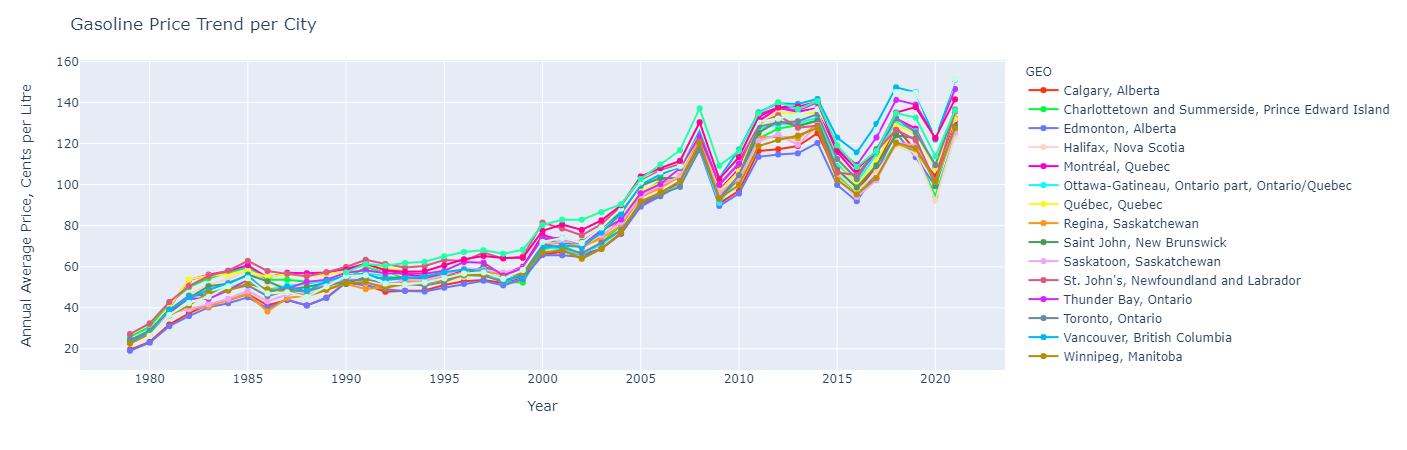

In [30]:
fig = px.line(price_bycity
                   ,x='Year', y = "Value", 
                   color = "GEO", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Gasoline Price Trend per City",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

Here, we will plot the average monthly prices of gasoline in Toronto for the year of 2021.


In [31]:
mon_trend = data[(data['Year'] ==  2021) & (data['GEO'] == "Toronto, Ontario")]
group_month = mon_trend.groupby(['Month'])['VALUE'].mean().reset_index().sort_values(by="VALUE")

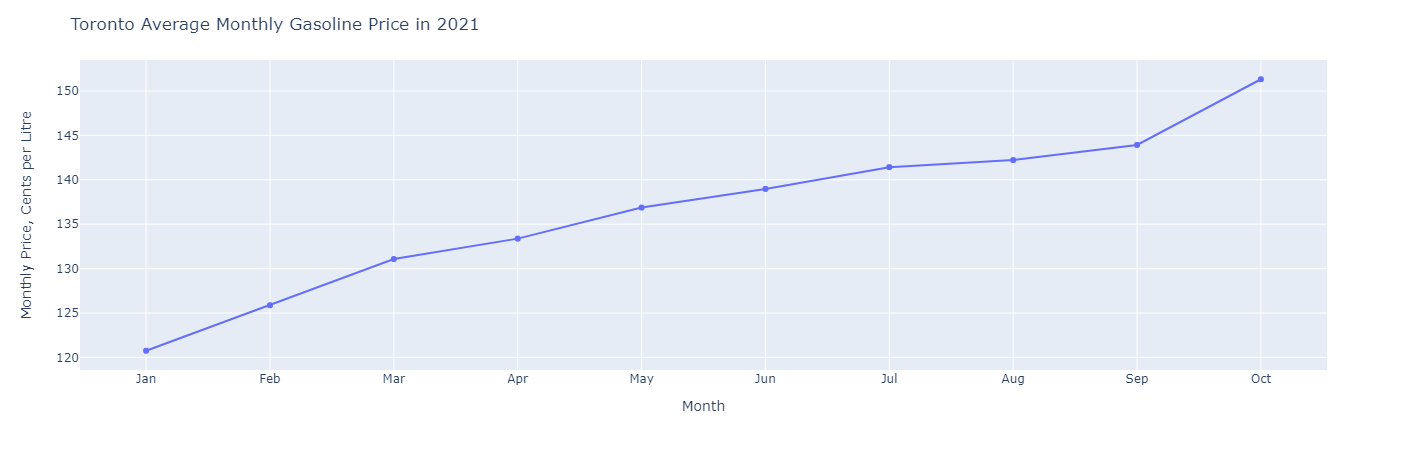

In [32]:
fig = px.line(group_month,
                   x='Month', y = "VALUE")
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Toronto Average Monthly Gasoline Price in 2021",
    xaxis_title="Month",
    yaxis_title="Monthly Price, Cents per Litre")
fig.show()

## Exercise 4


In the cell below, use *plotly.express* or other libraries, to plot the annual average gasoline price, per year, per gasoline type.


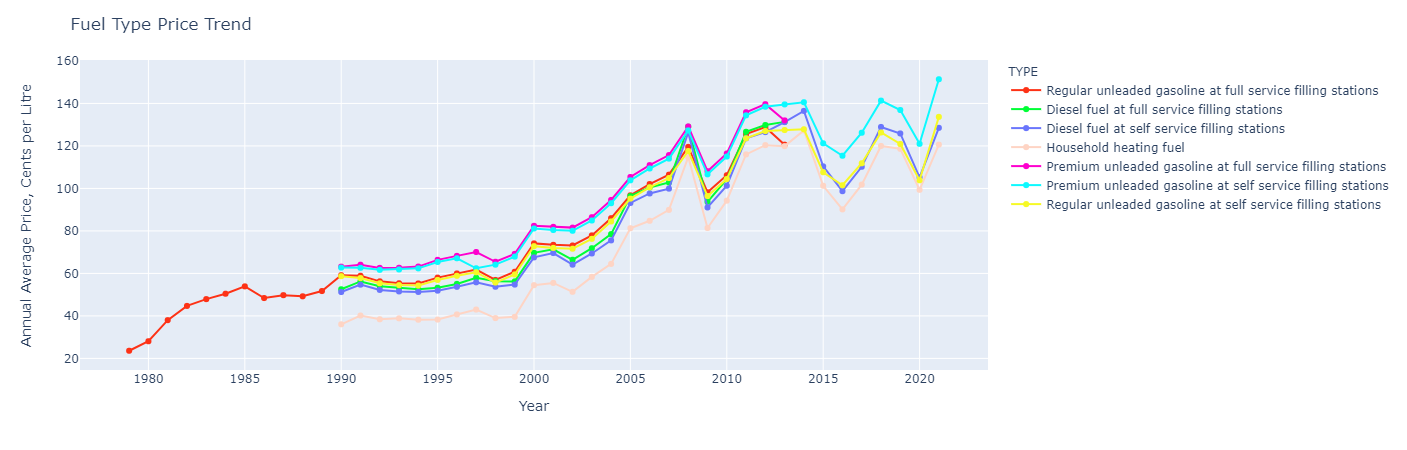

In [33]:
type_gas = data.groupby(['Year', 'TYPE'])['VALUE'].mean().reset_index(name ='Type').round(2)
fig = px.line(type_gas,
                   x='Year', y = "Type", 
                   color = "TYPE", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Fuel Type Price Trend",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
type_gas = data.groupby(['Year', 'TYPE'])['VALUE'].mean().reset_index(name ='Type').round(2)
fig = px.line(type_gas,
                   x='Year', y = "Type", 
                   color = "TYPE", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Fuel Type Price Trend",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

</code>
</details>


We can also use the animated time frame to show the trend of gasoline prices over time.


In [34]:
bycity = data.groupby(['Year', 'City'])['VALUE'].mean().reset_index(name ='Value').round(2)
bycity.head()

,Year,City,Value
0,1979,Calgary,19.61
1,1979,Charlottetown and Summerside,25.82
2,1979,Edmonton,19.08
3,1979,Halifax,24.52
4,1979,Montréal,23.86


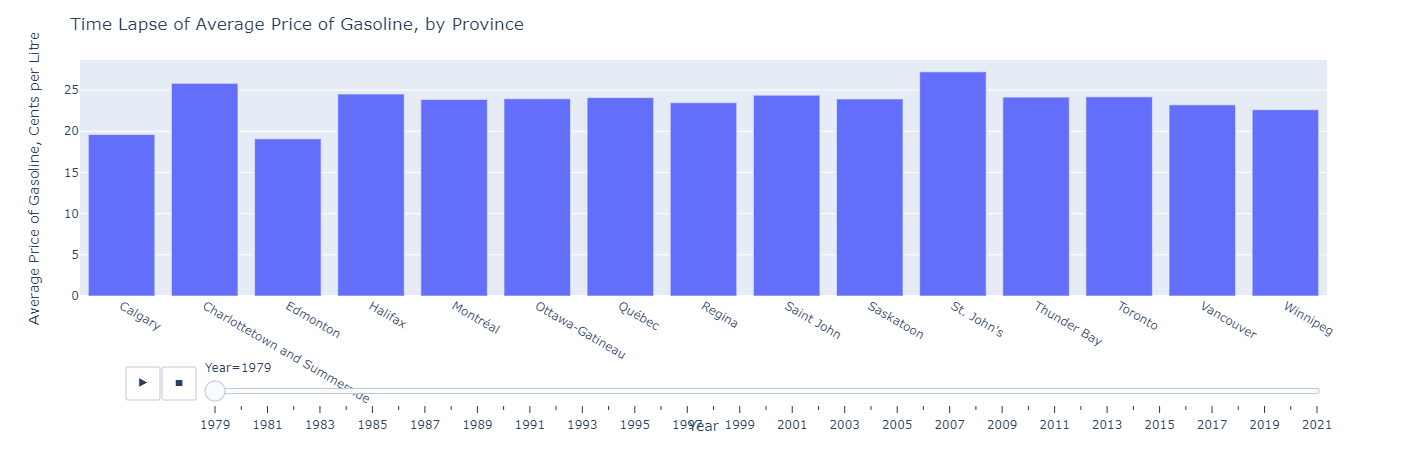

In [35]:
fig = px.bar(bycity,  
            x='City', y = "Value", animation_frame="Year")
fig.update_layout(
    title="Time Lapse of Average Price of Gasoline, by Province",
    xaxis_title="Year",
    yaxis_title="Average Price of Gasoline, Cents per Litre")

fig.show()
 

Another way to display the distribution of average gasoline prices in Canadian Provinces is by plotting a map. We will use 2021 year to display the average gasoline price in all Canadian Provinces.
First, we select the year.


In [36]:
one_year = data[data['Year'] == 2021]
one_year.head()

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
41252,2021-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at self service fill...,124.8,St. John's,Newfoundland and Labrador,Jan,2021
41253,2021-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at self service fill...,130.6,St. John's,Newfoundland and Labrador,Jan,2021
41254,2021-01-01,"St. John's, Newfoundland and Labrador",Diesel fuel at self service filling stations,126.7,St. John's,Newfoundland and Labrador,Jan,2021
41255,2021-01-01,"St. John's, Newfoundland and Labrador",Household heating fuel,89.8,St. John's,Newfoundland and Labrador,Jan,2021
41256,2021-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at self service fill...,109.1,Charlottetown and Summerside,Prince Edward Island,Jan,2021


Then, we group by the 'Province' and the 'mean' values of gasoline prices per each province. We also need to index each province with province id. 


In [37]:
geodata =  one_year.groupby('Province')['VALUE'].mean().reset_index(name ='Average Gasoline Price').round(2)

provinces={' Newfoundland and Labrador':5,
 ' Prince Edward Island':8,
 ' Nova Scotia':2,
 ' New Brunswick':7,
 ' Quebec':1,
 ' Ontario':11,
 ' Ontario part, Ontario/Quebec':12,
 ' Manitoba':10,
 ' Saskatchewan':3,
 ' Alberta':4,
 ' British Columbia':6,
 ' Yukon':9,
 ' Northwest Territories':13
}
geodata['ProvinceID']=geodata['Province'].map(provinces)
display(geodata)



,Province,Average Gasoline Price,ProvinceID
0,Alberta,130.48,4
1,British Columbia,151.17,6
2,Manitoba,127.48,10
3,New Brunswick,128.35,7
4,Newfoundland and Labrador,135.54,5
5,Northwest Territories,136.13,13
6,Nova Scotia,123.54,2
7,Ontario,140.85,11
8,"Ontario part, Ontario/Quebec",135.79,12
9,Prince Edward Island,123.80,8


Here, we are linking each province by its specified 'provinceID' with another dataset, ‘canada_provinces.geojson’, containing all the mapping information for plotting our provinces.

First, we need to download the Canadian Provinces dataset from IBM cloud storage, using the `requests.get()` function.


In [38]:
geo = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/canada_provinces.geojson")

Next, we will load the file as a string, using `json.loads()` function.


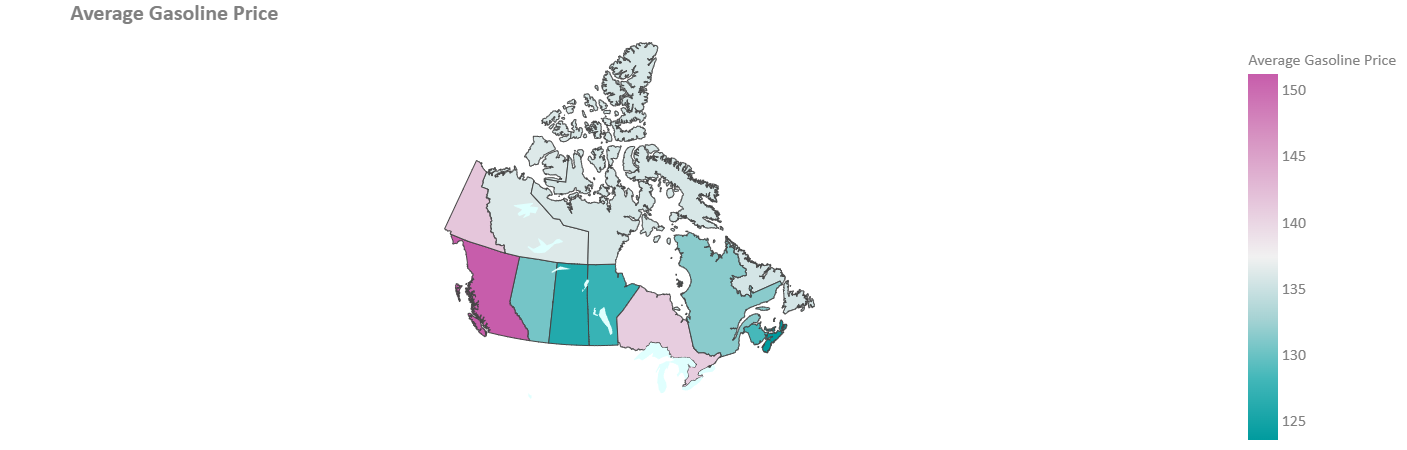

In [39]:
mp = json.loads(geo.text)
    
fig = px.choropleth(geodata,
                    locations="ProvinceID",
                    geojson=mp,
                    featureidkey="properties.cartodb_id",
                    color="Average Gasoline Price",
                    color_continuous_scale=px.colors.diverging.Tropic,
                    scope='north america',
                    title='<b>Average Gasoline Price </b>',                
                    hover_name='Province',
                    hover_data={
                        'Average Gasoline Price' : True,
                        'ProvinceID' : False
                    },
                     
                    locationmode='geojson-id',
                    )
fig.update_layout(
    showlegend=True,
    legend_title_text='<b>Average Gasoline Price</b>',
    font={"size": 16, "color": "#808080", "family" : "calibri"},
    margin={"r":0,"t":40,"l":0,"b":0},
    legend=dict(orientation='v'),
    geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='#e0fffe')
)

#Show Canada only 
fig.update_geos(showcountries=False, showcoastlines=False,
                showland=False, fitbounds="locations",
                subunitcolor='white')
fig.show()

## Exercise 5


In this exercise, experiment with different color scales to make the visualization easier to read. Some suggestions are provided in the "Hint" section. Simply copy the above code and replace 'px.colors.diverging.Tropic', with any other color scales. For example, the sequential color scales are appropriate for most continuous data, but in some cases it can be helpful to use a diverging or cyclical color scale. Diverging color scales are appropriate for the continuous data that has a natural midpoint. For more information on *plotly* colors, please visit [this plotly documentation](https://plotly.com/python/builtin-colorscales/) web page.


In [40]:
    px.colors.diverging.Tropic
    px.colors.diverging.Temps
    px.colors.sequential.Greens
    px.colors.sequential.Reds

['rgb(255,245,240)',
 'rgb(254,224,210)',
 'rgb(252,187,161)',
 'rgb(252,146,114)',
 'rgb(251,106,74)',
 'rgb(239,59,44)',
 'rgb(203,24,29)',
 'rgb(165,15,21)',
 'rgb(103,0,13)']

<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
    px.colors.diverging.Tropic
    px.colors.diverging.Temps
    px.colors.sequential.Greens
    px.colors.sequential.Reds

</code>
</details>


# Congratulations! - You have completed the lab


## Author


[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/)


Copyright © 2020 IBM Corporation. All rights reserved.

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2022-01-18        | 0.1     |Svitlana K. | Added Introduction      |
--!>
